In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [28]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')

In [30]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data = data[4000576:].copy()

In [32]:
data.fillna(method="ffill", inplace=True)

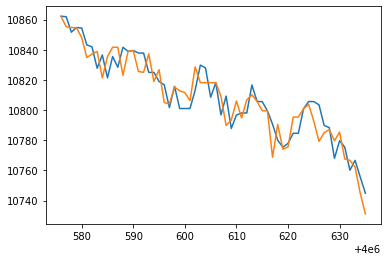

In [33]:
plt.plot(data['Open'][:60])
plt.plot(data['Close'][:60])

In [34]:
data['Open'][:60].mean().round(1)

10809.5

In [35]:
data2 = data.drop(columns=['High',
                           'Low',
                           'Close',
                           'Volume_(BTC)',
                           'Volume_(Currency)',
                           'Weighted_Price']).copy() #.set_index("Timestamp")

In [36]:
data2.reset_index(inplace=True, drop=True)

In [37]:
data2 = data2[:-1].copy()

In [38]:
data2

,Timestamp,Open
0,2019-08-14 00:00:00,10862.25
1,2019-08-14 00:01:00,10861.93
2,2019-08-14 00:02:00,10851.67
3,2019-08-14 00:03:00,10854.76
4,2019-08-14 00:04:00,10854.47
...,...,...
727195,2020-12-30 23:55:00,28809.07
727196,2020-12-30 23:56:00,28801.47
727197,2020-12-30 23:57:00,28829.42
727198,2020-12-30 23:58:00,28850.49


In [40]:
data = data[:-1].copy()

In [42]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4000576,2019-08-14 00:00:00,10862.25,10862.25,10862.25,10862.25,0.020363,221.187997,10862.250000
4000577,2019-08-14 00:01:00,10861.93,10862.15,10842.78,10855.27,3.030780,32911.885943,10859.212261
4000578,2019-08-14 00:02:00,10851.67,10854.77,10833.10,10854.77,0.614111,6658.078524,10841.815388
4000579,2019-08-14 00:03:00,10854.76,10854.76,10854.57,10854.57,0.008578,93.108541,10854.746427
4000580,2019-08-14 00:04:00,10854.47,10854.47,10837.21,10848.13,0.276125,2995.135785,10847.042394
...,...,...,...,...,...,...,...,...
4727771,2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
4727772,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266


In [43]:
data2 = data2.groupby(pd.Grouper(key="Timestamp", freq="1h")).mean().round(1).copy()

In [44]:
data.reset_index(inplace=True, drop=True)

In [45]:
data2

,Open
Timestamp,
2019-08-14 00:00:00,10809.5
2019-08-14 01:00:00,10650.8
2019-08-14 02:00:00,10582.4
2019-08-14 03:00:00,10595.8
2019-08-14 04:00:00,10571.7
...,...
2020-12-30 19:00:00,28754.4
2020-12-30 20:00:00,28804.1
2020-12-30 21:00:00,28840.5


In [46]:
data.set_index(keys="Timestamp", inplace=True)

In [47]:
data

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2019-08-14 00:00:00,10862.25,10862.25,10862.25,10862.25,0.020363,221.187997,10862.250000
2019-08-14 00:01:00,10861.93,10862.15,10842.78,10855.27,3.030780,32911.885943,10859.212261
2019-08-14 00:02:00,10851.67,10854.77,10833.10,10854.77,0.614111,6658.078524,10841.815388
2019-08-14 00:03:00,10854.76,10854.76,10854.57,10854.57,0.008578,93.108541,10854.746427
2019-08-14 00:04:00,10854.47,10854.47,10837.21,10848.13,0.276125,2995.135785,10847.042394
...,...,...,...,...,...,...,...
2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863


In [59]:
data.iloc[6000]

Open                 10108.830000
High                 10128.100000
Low                  10107.280000
Close                10120.910000
Volume_(BTC)             1.276112
Volume_(Currency)    12908.241656
Weighted_Price       10115.287161
Name: 2019-08-18 04:00:00, dtype: float64

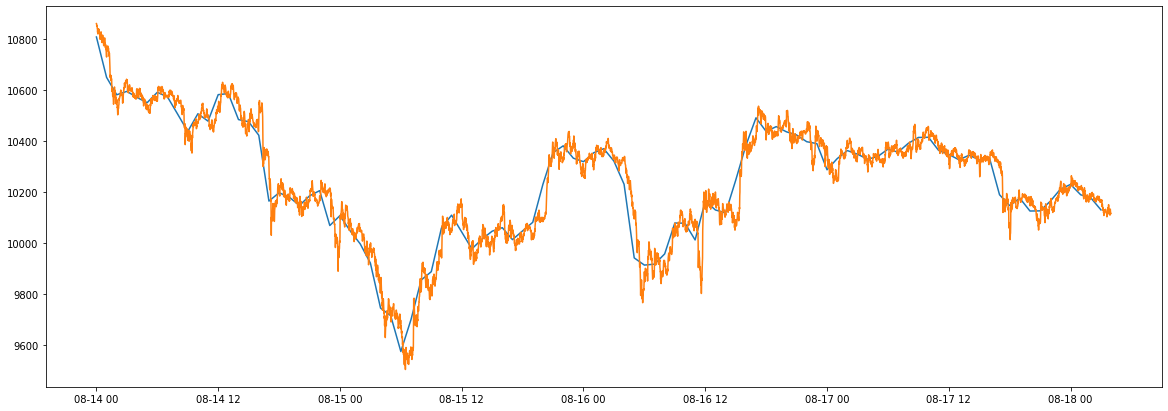

In [53]:
plt.figure(figsize=(20,7))
plt.plot(data2['Open'][:100])
plt.plot(data['Open'][:6000]);

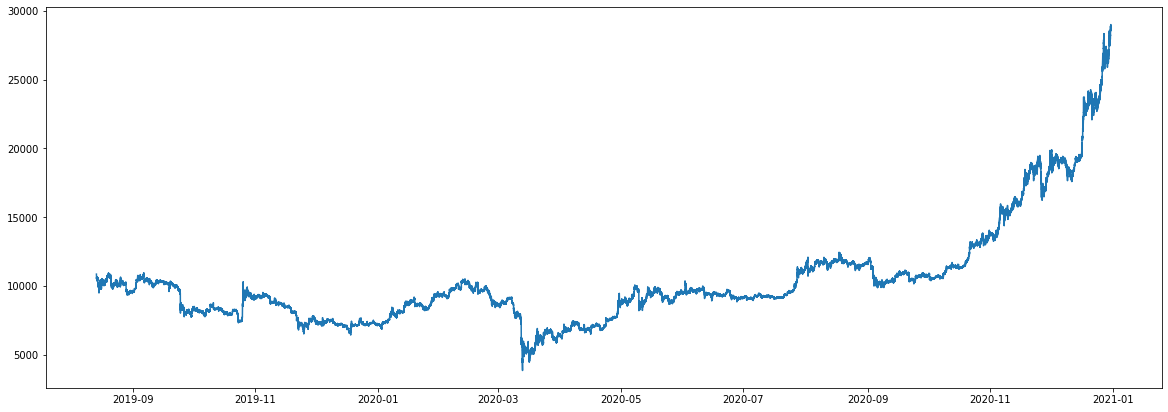

In [51]:
plt.figure(figsize=(20,7))
plt.plot(data['Open'])

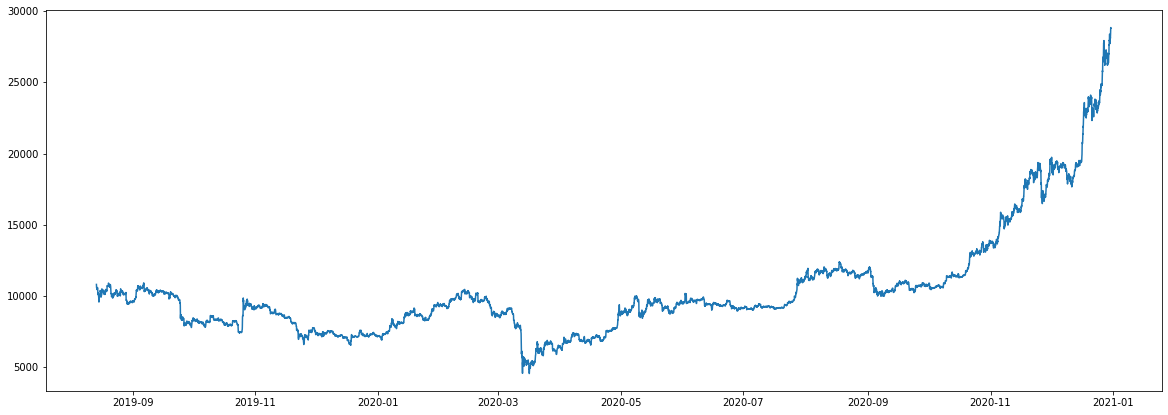

In [52]:
plt.figure(figsize=(20,7))
plt.plot(data2['Open'])